In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv('C:/Users/lucif/Downloads/gym_members_exercise_tracking.csv')

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [8]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std())

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    4324 non-null   float64
 1   Unnamed: 0      4324 non-null   float64
 2   Company Name    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Datum           4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Status Rocket   4324 non-null   object 
 7    Rocket         964 non-null    object 
 8   Status Mission  4324 non-null   object 
dtypes: float64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,0.000000,0.000000
std,1.000000,1.000000
min,-1.731450,-1.731450
25%,-0.865725,-0.865725
50%,0.000000,0.000000
75%,0.865725,0.865725
max,1.731450,1.731450


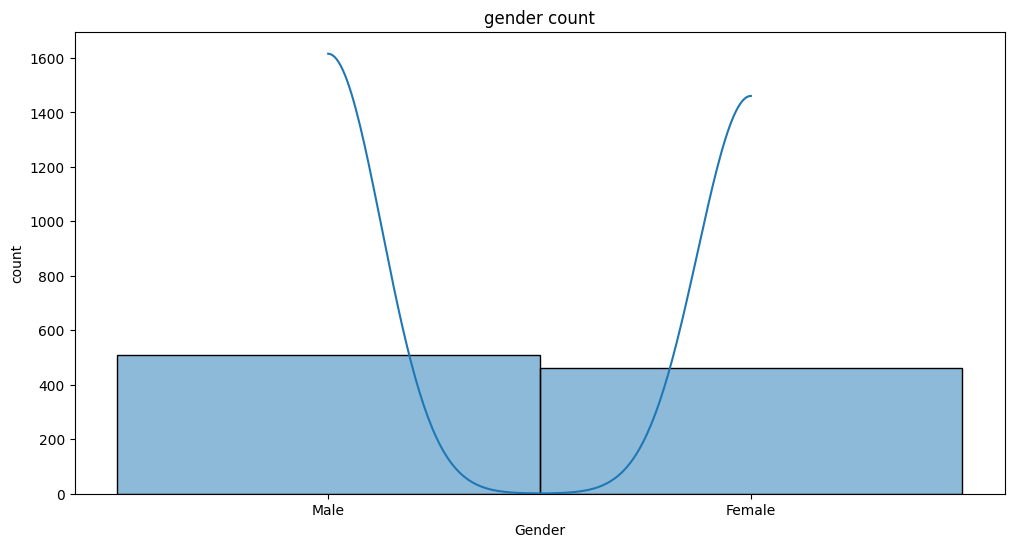

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Gender'], bins=30, kde=True)
plt.title('gender count')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

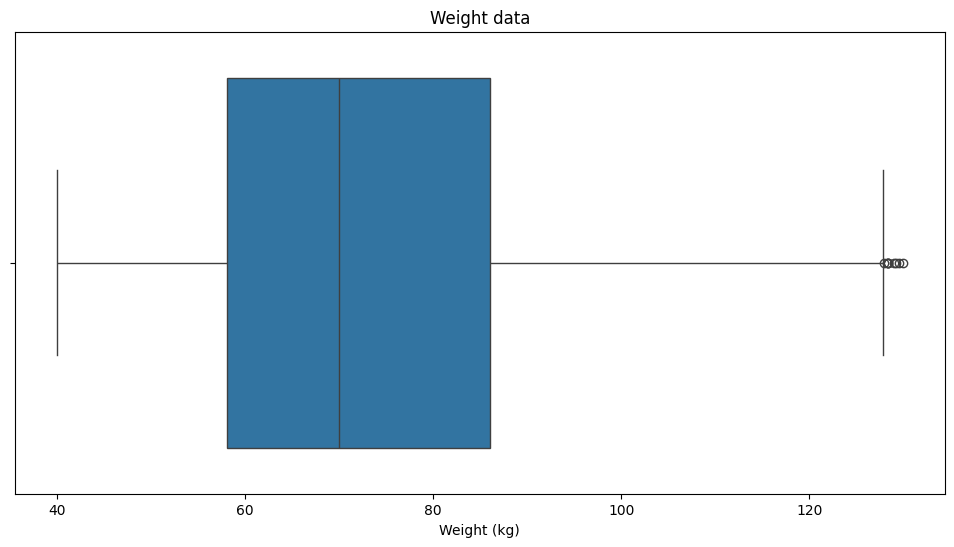

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Weight (kg)'])
plt.title('Weight data')
plt.xlabel('Weight (kg)')
plt.show()

In [19]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

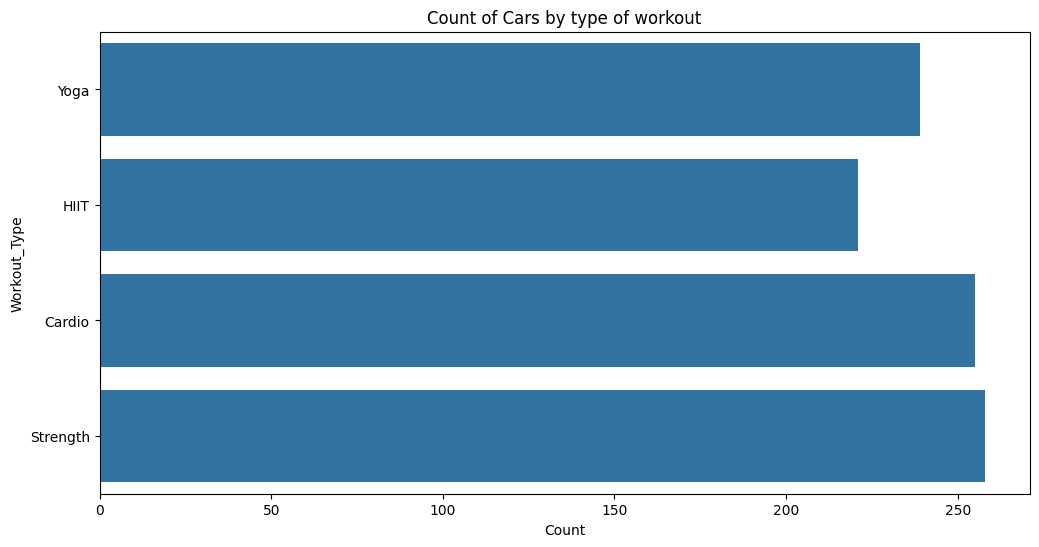

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Workout_Type', data=df)
plt.title('Count of Cars by type of workout')
plt.xlabel('Count')
plt.ylabel('Workout_Type')
plt.show()

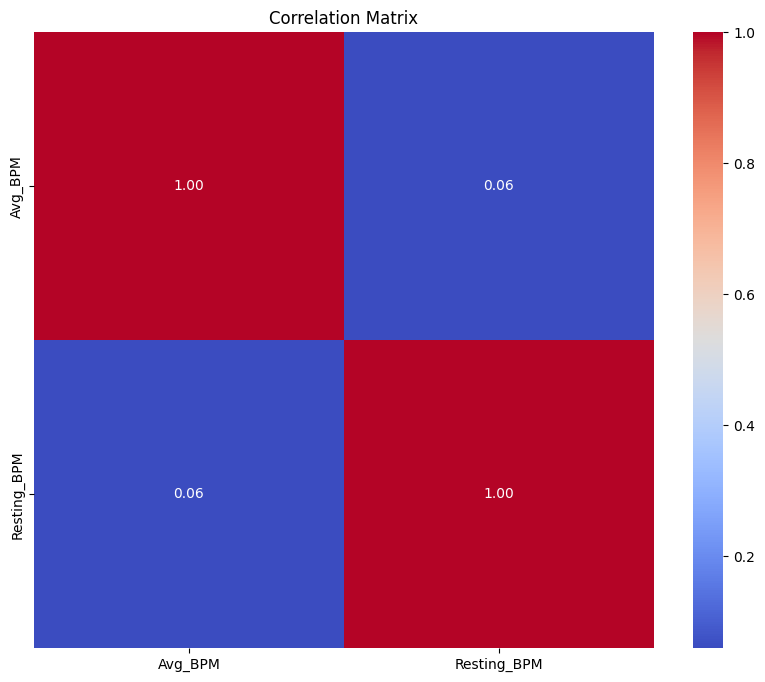

In [34]:
correlation_matrix = df[["Avg_BPM","Resting_BPM"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

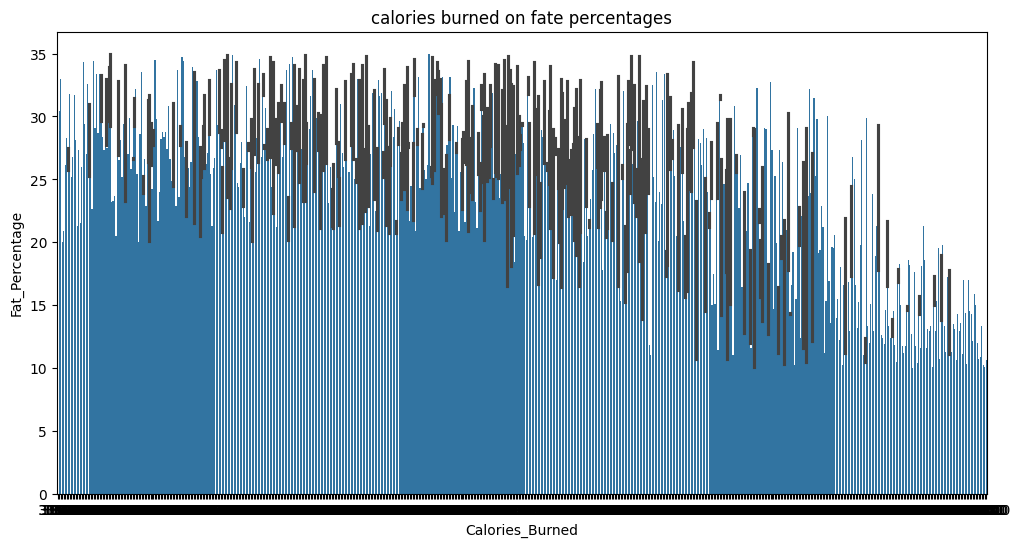

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Calories_Burned', y='Fat_Percentage', data=df, estimator='mean')
plt.title('calories burned on fate percentages')
plt.xlabel('Calories_Burned')
plt.ylabel('Fat_Percentage')
plt.show()

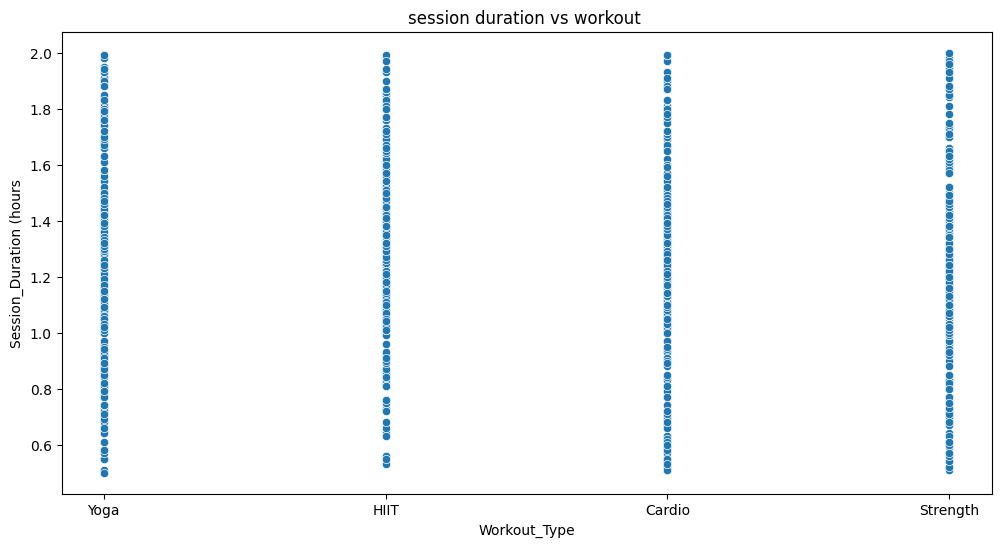

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Workout_Type', y='Session_Duration (hours)', data=df)
plt.title('session duration vs workout ')
plt.xlabel('Workout_Type')
plt.ylabel('Session_Duration (hours')
plt.show()